# Plot sampling uncertainty distributions

In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import xarray as xr
import pandas as pd

import pylab as plot
import matplotlib.pyplot as plt
import seaborn as sns

## Set Paths

In [2]:
# Set Paths
ROOT = Path("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/")
AUXDATA = Path(f"{ROOT}/aux_data")
RESULTS = Path(f"{ROOT}/results/")

## Set Config

In [3]:
# Set GUMBOOT result files
wflow_calibrated_kge_csv = f'{RESULTS}/wflow_sbm/wflow_calibrated_kge_np_gumboot.csv'
wflow_uncalibrated_kge_csv = f'{RESULTS}/wflow_sbm/wflow_uncalibrated_kge_np_gumboot.csv'
pcrglob_kge_csv = f'{RESULTS}/pcr-globwb/pcr-globwb_kge_np_gumboot.csv'

wflow_calibrated_nse_csv = f'{RESULTS}/wflow_sbm/wflow_calibrated_nse_gumboot.csv'
wflow_uncalibrated_nse_csv = f'{RESULTS}/wflow_sbm/wflow_uncalibrated_nse_gumboot.csv'
pcrglob_nse_csv = f'{RESULTS}/pcr-globwb/pcr-globwb_nse_gumboot.csv'

# Load available basin_IDs
df_basin_ids = pd.read_csv(f"{AUXDATA}/available_basin_ids_uncertainty.csv", index_col='basin_id')

## Load dataframes

In [4]:
def load_result_dataframe(csv_file, df_basin_ids):
    
    # Load dataframes
    df = pd.read_csv(csv_file, index_col='basin_id')
    
    # Combine dataframes
    df = df_basin_ids.join(df)
    
    # Drop NaN values
    df = df[df['seJack'].notna()]
    
    return df

In [5]:
# Load KGE-NP results
df_kge_wflow_calibrated = load_result_dataframe(wflow_calibrated_kge_csv, df_basin_ids)
df_kge_wflow_uncalibrated = load_result_dataframe(wflow_uncalibrated_kge_csv, df_basin_ids)
df_kge_pcrglob = load_result_dataframe(pcrglob_kge_csv, df_basin_ids)

# Load NSE results
df_nse_wflow_calibrated = load_result_dataframe(wflow_calibrated_nse_csv, df_basin_ids)
df_nse_wflow_uncalibrated = load_result_dataframe(wflow_uncalibrated_nse_csv, df_basin_ids)
df_nse_pcrglob = load_result_dataframe(pcrglob_nse_csv, df_basin_ids)

## Calculate tolerance interval

In [6]:
def calculate_tolerance(df):
    # Calculate tolerance interval 
    df['2xJack'] = df['seJack'] * 2
    df['2xBoot'] = df['seBoot'] * 2
    df['tolerance'] = df['p95'] - df['p05']

    df = df.sort_values(by=['2xJack'])
    df = df.reset_index()
    
    return df

In [7]:
# Tolerance interval KGE-NP results
df_kge_wflow_calibrated = calculate_tolerance(df_kge_wflow_calibrated)
df_kge_wflow_uncalibrated = calculate_tolerance(df_kge_wflow_uncalibrated)
df_kge_pcrglob = calculate_tolerance(df_kge_pcrglob)

# Tolerance interval NSE results
df_nse_wflow_calibrated = calculate_tolerance(df_nse_wflow_calibrated)
df_nse_wflow_uncalibrated = calculate_tolerance(df_nse_wflow_uncalibrated)
df_nse_pcrglob = calculate_tolerance(df_nse_pcrglob)

# Plot KGE-NP sampling uncertainty

/scratch-local/jaerts.2598960/ipykernel_3615614/644912614.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(labels)
/scratch-local/jaerts.2598960/ipykernel_3615614/644912614.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(labels)
/scratch-local/jaerts.2598960/ipykernel_3615614/644912614.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(labels)


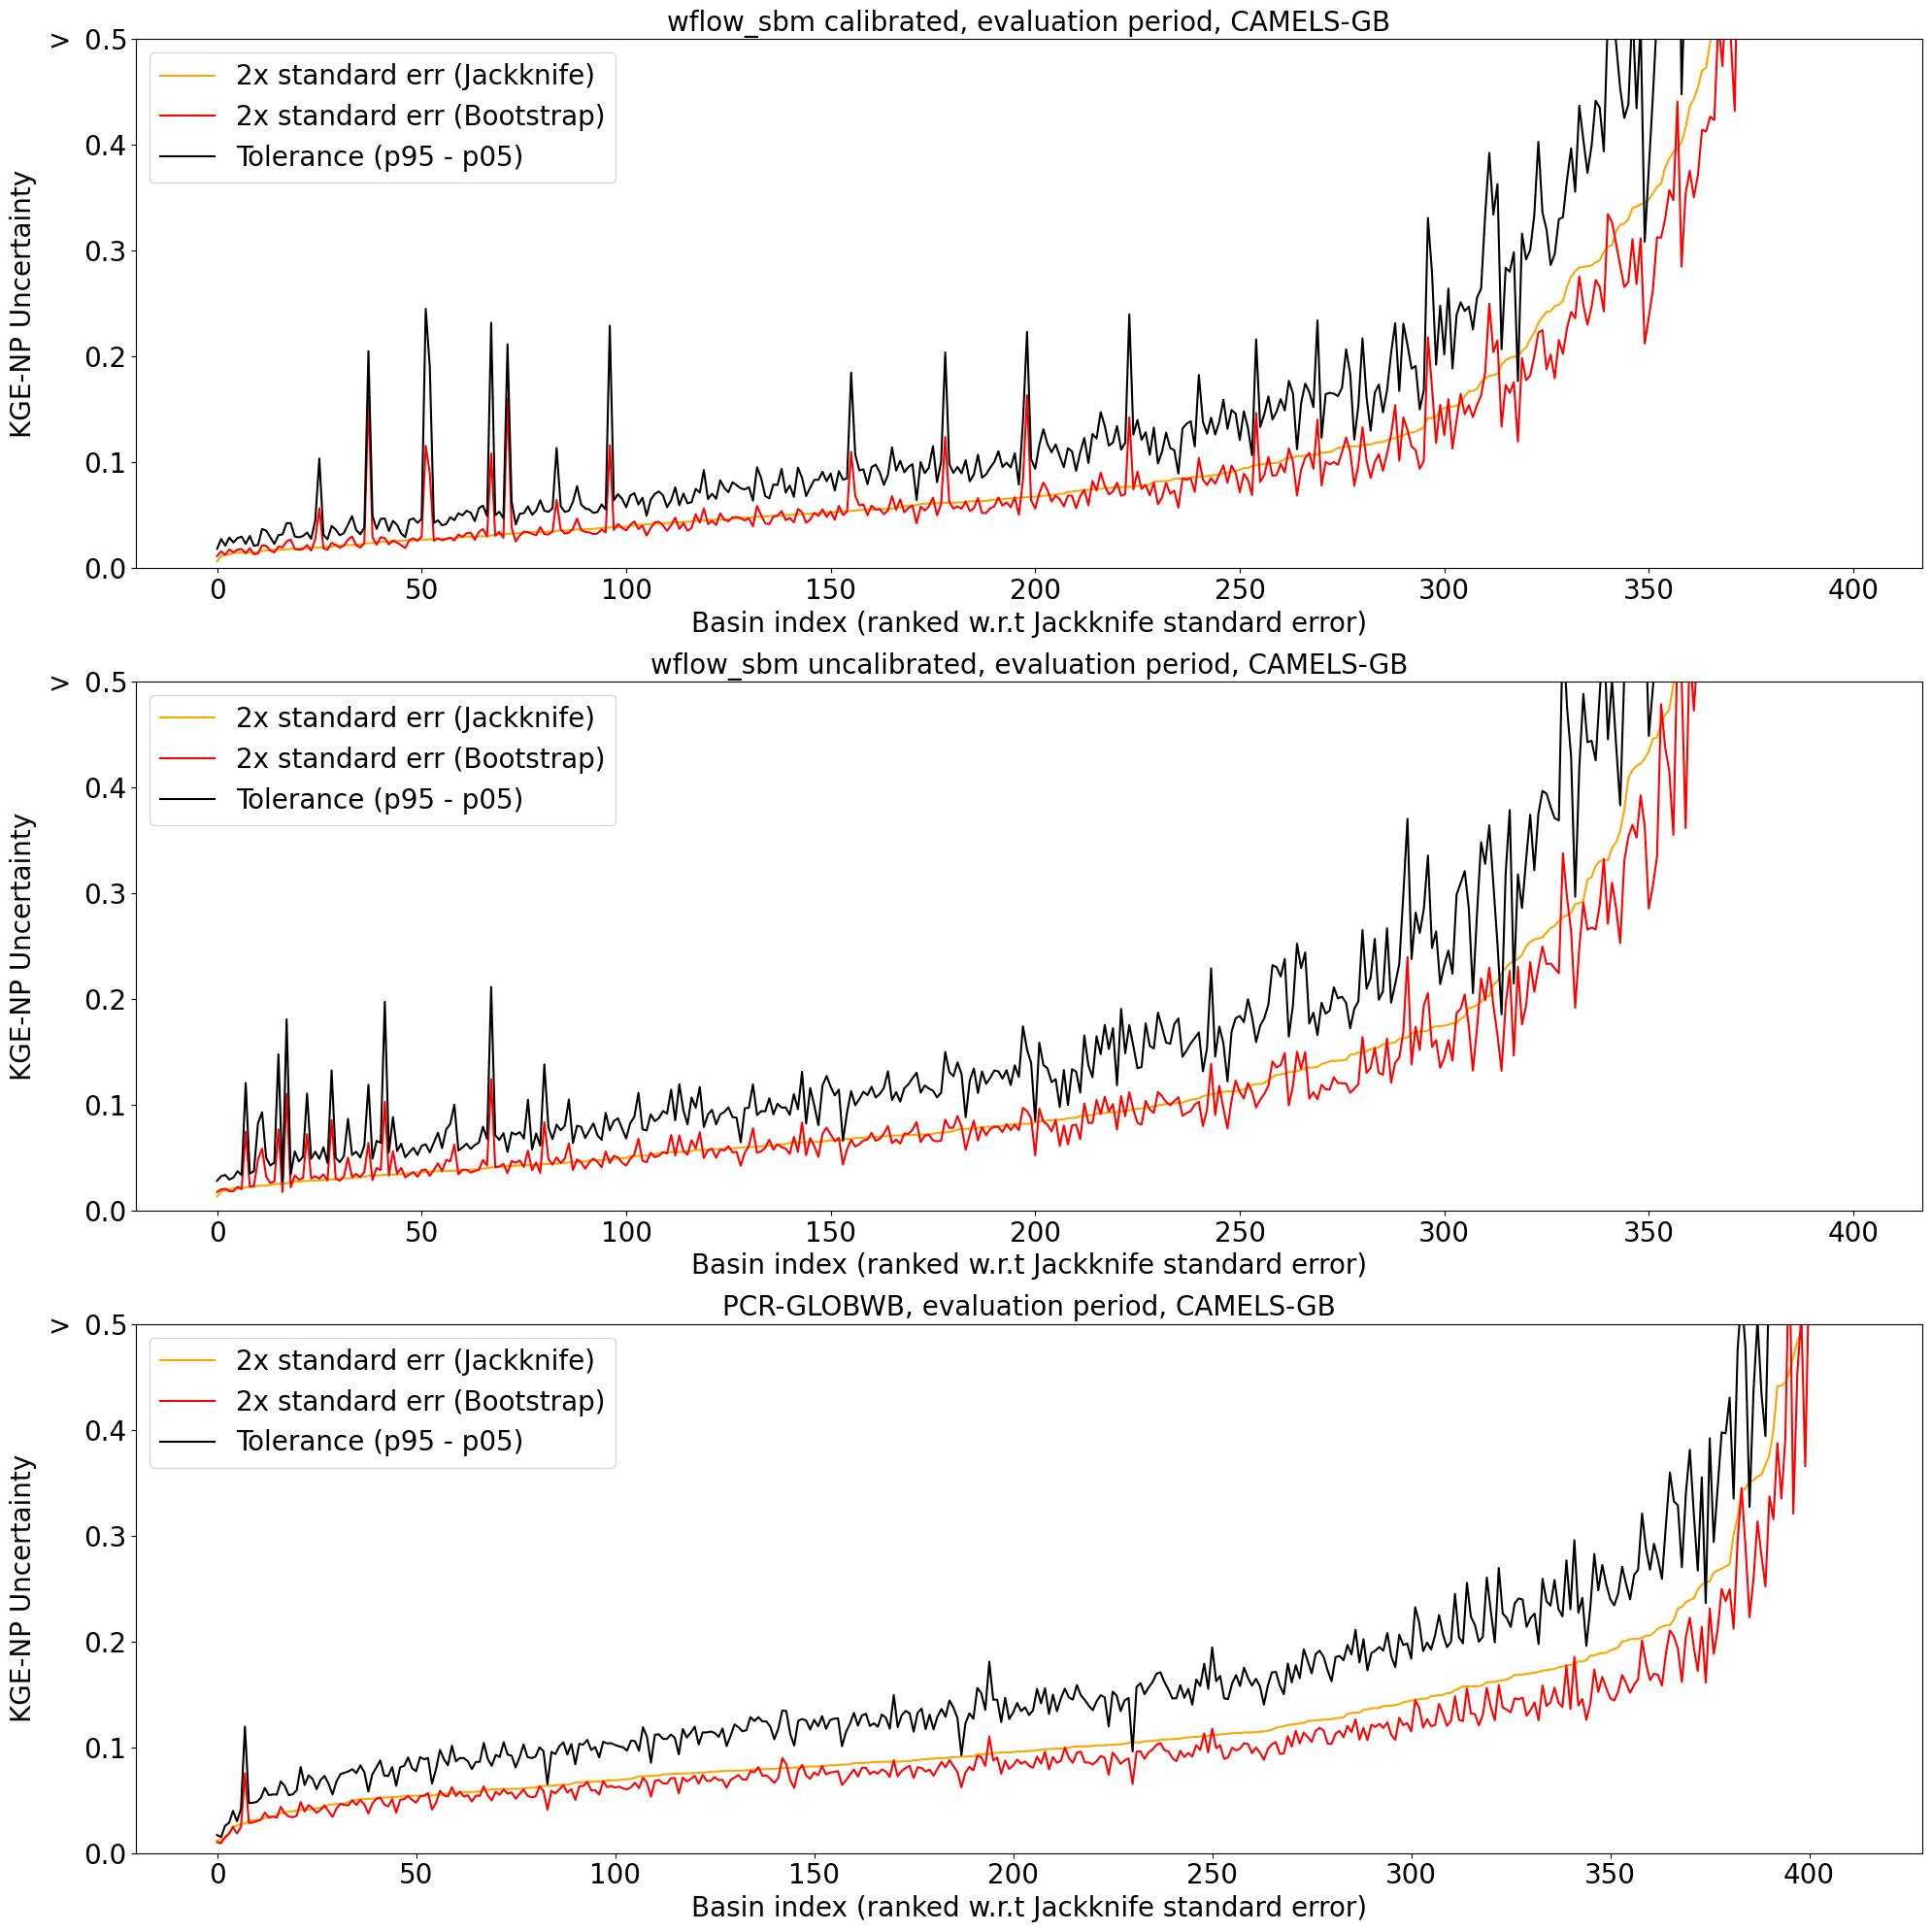

In [16]:
# Plot Figure
fig, axes = plt.subplots(3,1,figsize=(20, 20))

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
         'axes.labelsize': 20}
plot.rcParams.update(params)
                     
    
# wflow_sbm calibrated
sns.lineplot(ax=axes[0], y=df_kge_wflow_calibrated['2xJack'], x=df_kge_wflow_calibrated.index, label='2x standard err (Jackknife)', color='orange')
sns.lineplot(ax=axes[0], y=df_kge_wflow_calibrated['2xBoot'], x=df_kge_wflow_calibrated.index, label='2x standard err (Bootstrap)', color='red')
sns.lineplot(ax=axes[0], y=df_kge_wflow_calibrated['tolerance'], x=df_kge_wflow_calibrated.index, label='Tolerance (p95 - p05)', color='black')

axes[0].set_ylim(0, 0.5)

axes[0].set_xlabel('Basin index (ranked w.r.t Jackknife standard error)', size=20)
axes[0].set_ylabel('KGE-NP Uncertainty', size=20)

fig.canvas.draw()

labels = [item.get_text() for item in axes[0].get_yticklabels()]
labels[5] = r'$>$ 0.5' 
axes[0].set_yticklabels(labels)
               
axes[0].set_title('wflow_sbm calibrated, evaluation period, CAMELS-GB', size=20)   

# wflow_sbm uncalibrated
sns.lineplot(ax=axes[1], y=df_kge_wflow_uncalibrated['2xJack'], x=df_kge_wflow_uncalibrated.index, label='2x standard err (Jackknife)', color='orange')
sns.lineplot(ax=axes[1], y=df_kge_wflow_uncalibrated['2xBoot'], x=df_kge_wflow_uncalibrated.index, label='2x standard err (Bootstrap)', color='red')
sns.lineplot(ax=axes[1], y=df_kge_wflow_uncalibrated['tolerance'], x=df_kge_wflow_uncalibrated.index, label='Tolerance (p95 - p05)', color='black')

axes[1].set_ylim(0, 0.5)

axes[1].set_xlabel('Basin index (ranked w.r.t Jackknife standard error)', size=20)
axes[1].set_ylabel('KGE-NP Uncertainty', size=20)

fig.canvas.draw()

labels = [item.get_text() for item in axes[1].get_yticklabels()]
labels[5] = r'$>$ 0.5' 
axes[1].set_yticklabels(labels)
               
axes[1].set_title('wflow_sbm uncalibrated, evaluation period, CAMELS-GB', size=20) 

# pcr-globwb 
sns.lineplot(ax=axes[2], y=df_kge_pcrglob['2xJack'], x=df_kge_pcrglob.index, label='2x standard err (Jackknife)', color='orange')
sns.lineplot(ax=axes[2], y=df_kge_pcrglob['2xBoot'], x=df_kge_pcrglob.index, label='2x standard err (Bootstrap)', color='red')
sns.lineplot(ax=axes[2], y=df_kge_pcrglob['tolerance'], x=df_kge_pcrglob.index, label='Tolerance (p95 - p05)', color='black')

axes[2].set_ylim(0, 0.5)

axes[2].set_xlabel('Basin index (ranked w.r.t Jackknife standard error)', size=20)
axes[2].set_ylabel('KGE-NP Uncertainty', size=20)

fig.canvas.draw()

labels = [item.get_text() for item in axes[2].get_yticklabels()]
labels[5] = r'$>$ 0.5' 
axes[2].set_yticklabels(labels)
               
axes[2].set_title('PCR-GLOBWB, evaluation period, CAMELS-GB', size=20)   

plt.xticks(fontsize=20)
plt.tight_layout()
plt.savefig('/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/plots/A2_evaluation_period_kge_np_sampling_uncertainty.png', bbox_inches='tight', dpi=300)

# Plot NSE sampling uncertainty

/scratch-local/jaerts.2598960/ipykernel_3615614/725725121.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(labels)
/scratch-local/jaerts.2598960/ipykernel_3615614/725725121.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(labels)
/scratch-local/jaerts.2598960/ipykernel_3615614/725725121.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(labels)


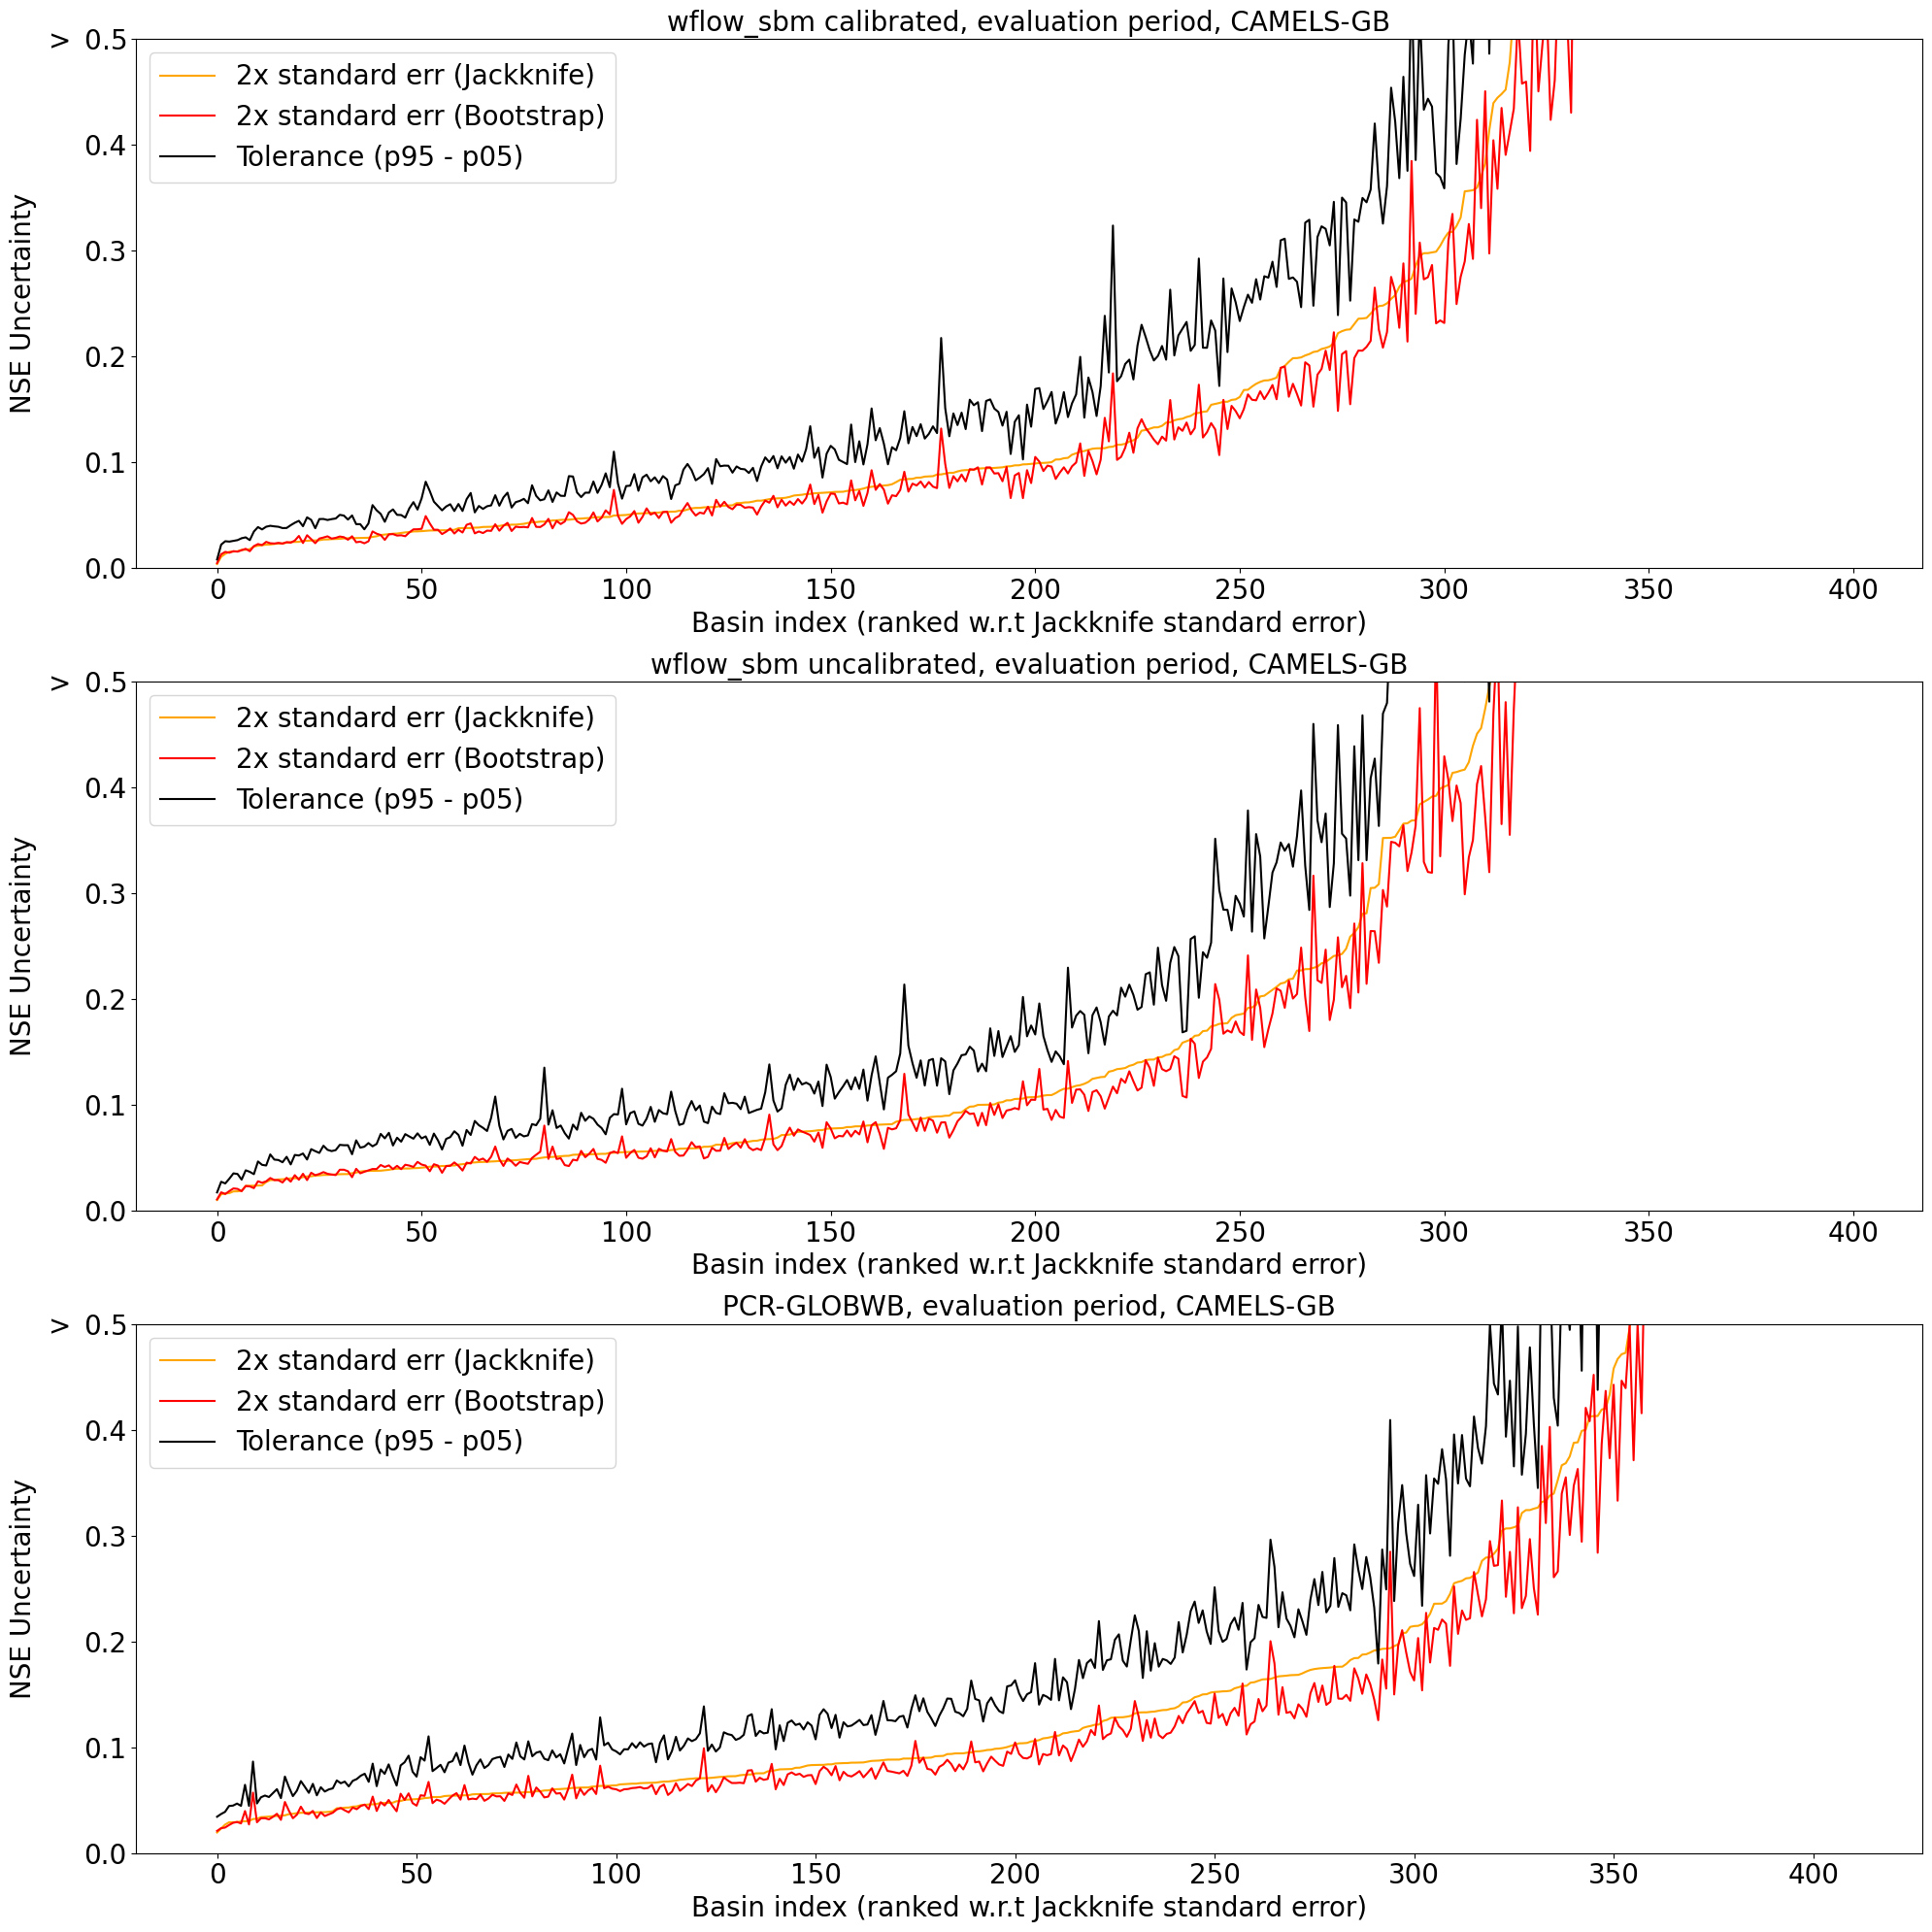

In [17]:
# Plot Figure
fig, axes = plt.subplots(3,1,figsize=(20, 20))

params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
         'axes.labelsize': 20}
plot.rcParams.update(params)
                     
    
# wflow_sbm calibrated
sns.lineplot(ax=axes[0], y=df_nse_wflow_calibrated['2xJack'], x=df_nse_wflow_calibrated.index, label='2x standard err (Jackknife)', color='orange')
sns.lineplot(ax=axes[0], y=df_nse_wflow_calibrated['2xBoot'], x=df_nse_wflow_calibrated.index, label='2x standard err (Bootstrap)', color='red')
sns.lineplot(ax=axes[0], y=df_nse_wflow_calibrated['tolerance'], x=df_nse_wflow_calibrated.index, label='Tolerance (p95 - p05)', color='black')

axes[0].set_ylim(0, 0.5)

axes[0].set_xlabel('Basin index (ranked w.r.t Jackknife standard error)', size=20)
axes[0].set_ylabel('NSE Uncertainty', size=20)

fig.canvas.draw()

labels = [item.get_text() for item in axes[0].get_yticklabels()]
labels[5] = r'$>$ 0.5' 
axes[0].set_yticklabels(labels)
               
axes[0].set_title('wflow_sbm calibrated, evaluation period, CAMELS-GB', size=20)   

# wflow_sbm uncalibrated
sns.lineplot(ax=axes[1], y=df_nse_wflow_uncalibrated['2xJack'], x=df_nse_wflow_uncalibrated.index, label='2x standard err (Jackknife)', color='orange')
sns.lineplot(ax=axes[1], y=df_nse_wflow_uncalibrated['2xBoot'], x=df_nse_wflow_uncalibrated.index, label='2x standard err (Bootstrap)', color='red')
sns.lineplot(ax=axes[1], y=df_nse_wflow_uncalibrated['tolerance'], x=df_nse_wflow_uncalibrated.index, label='Tolerance (p95 - p05)', color='black')

axes[1].set_ylim(0, 0.5)

axes[1].set_xlabel('Basin index (ranked w.r.t Jackknife standard error)', size=20)
axes[1].set_ylabel('NSE Uncertainty', size=20)

fig.canvas.draw()

labels = [item.get_text() for item in axes[1].get_yticklabels()]
labels[5] = r'$>$ 0.5' 
axes[1].set_yticklabels(labels)
               
axes[1].set_title('wflow_sbm uncalibrated, evaluation period, CAMELS-GB', size=20) 

# pcr-globwb 
sns.lineplot(ax=axes[2], y=df_nse_pcrglob['2xJack'], x=df_nse_pcrglob.index, label='2x standard err (Jackknife)', color='orange')
sns.lineplot(ax=axes[2], y=df_nse_pcrglob['2xBoot'], x=df_nse_pcrglob.index, label='2x standard err (Bootstrap)', color='red')
sns.lineplot(ax=axes[2], y=df_nse_pcrglob['tolerance'], x=df_nse_pcrglob.index, label='Tolerance (p95 - p05)', color='black')

axes[2].set_ylim(0, 0.5)

axes[2].set_xlabel('Basin index (ranked w.r.t Jackknife standard error)', size=20)
axes[2].set_ylabel('NSE Uncertainty', size=20)

fig.canvas.draw()

labels = [item.get_text() for item in axes[2].get_yticklabels()]
labels[5] = r'$>$ 0.5' 
axes[2].set_yticklabels(labels)
               
axes[2].set_title('PCR-GLOBWB, evaluation period, CAMELS-GB', size=20)   



plt.tight_layout()
plt.savefig('/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/plots/A2_evaluation_period_nse_sampling_uncertainty.png', bbox_inches='tight', dpi=300)